• DOMAIN:  Electronics and Telecommunication 

• CONTEXT:  A  communications  equipment  manufacturing  company  has  a  product  which  is  responsible  for  emitting  informative  signals. Company  wants  to  build  a  machine  learning  model  which  can  help  the  company  to  predict  the  equipment’s  signal  quality  using  various 
parameters.  

• DATA DESCRIPTION: The data set contains information on various signal tests performed: 

1. Parameters: Various measurable signal parameters. 

2. Signal_Quality: Final signal strength or quality 

• PROJECT OBJECTIVE: To build a classi fier which can use the given parameters to determine the signal strength or quality

1. Data import and Understanding

A. Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv('NN Project Data - Signal.csv')

In [2]:
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [4]:
data.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [5]:
cols = [x for x in data.columns]
print(cols)

['Parameter 1 ', 'Parameter 2 ', 'Parameter 3 ', 'Parameter 4 ', 'Parameter 5 ', 'Parameter 6 ', 'Parameter 7 ', 'Parameter 8 ', 'Parameter 9 ', 'Parameter 10 ', 'Parameter 11 ', 'Signal_Strength']


B. Check for missing values and print percentage for each attribute

In [6]:
null_val = data.isnull().sum()
print(null_val)

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


In [7]:
zero_val = (data==0).sum()
print(zero_val)

Parameter 1          0
Parameter 2          0
Parameter 3        132
Parameter 4          0
Parameter 5          0
Parameter 6          0
Parameter 7          0
Parameter 8          0
Parameter 9          0
Parameter 10         0
Parameter 11         0
Signal_Strength      0
dtype: int64


There are no nulll values, But the data has some 0 in column 'parameter 3' but the min and max value is 0 and 1 in that column. So, it is justifiable if the column has 0 as value

C. Check for presence of duplicate records in the dataset and impute with appropriate method

In [8]:
dup_record = data[data.duplicated()]
print(len(dup_record))

240


There are 240 duplicated rows, we will drop them

In [9]:
data.shape

(1599, 12)

In [10]:
cleaned_data = data.drop_duplicates().reset_index(drop=True)
cleaned_data.shape

(1359, 12)

In [11]:
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


D. Visualise distribution of the target variable.

<Figure size 1000x600 with 0 Axes>

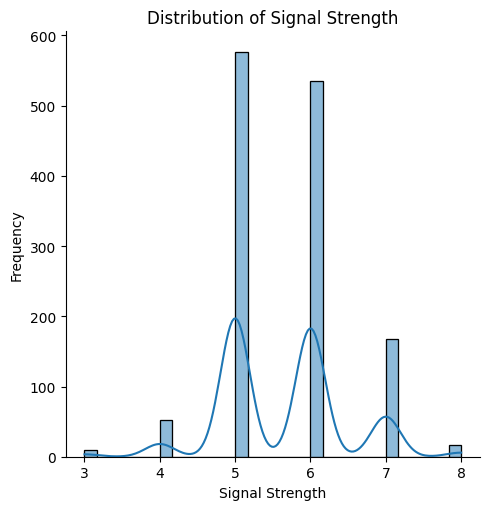

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.displot(cleaned_data['Signal_Strength'], kde=True, bins=30)
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.show()



E. Share insights from the initial data analysis

- The target column has value 5 and 6 more comparing to other values
- PAramerter 2, Parameter 3 are normally distributed
- Parameter 6 seems to one of the more skewed column

2. Data preprocessing

A. Split the data into X & Y.

In [13]:
x = cleaned_data.drop('Signal_Strength', axis=1)
y = cleaned_data['Signal_Strength']

B. Split the data into train & test with 70:30 proportion.

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

C. Print shape of all the 4 variables and verify if train and test data is in sync. 

In [15]:
print(f'Training data size: xtrain={len(xtrain)}, ytrain={len(ytrain)},\
      \nTesting data size: xtest={len(xtest)} ytest={len(ytest)}')

Training data size: xtrain=951, ytrain=951,      
Testing data size: xtest=408 ytest=408


D. Normalise the train and test data with appropriate method

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [17]:
print(xtrain_scaled)

[[-0.5303845   0.77331285 -0.78928573 ...  0.54682001 -0.72312759
  -0.86579624]
 [-1.38259614 -0.70505443 -0.73809841 ...  2.07454948  0.09071186
   1.82713749]
 [-1.83710901 -0.30186335 -1.30115883 ...  3.93439405 -0.22230331
   2.19857663]
 ...
 [-0.70082683 -1.96838647  0.84870822 ...  0.28112793 -0.72312759
   1.82713749]
 [-0.24631396 -0.94696907  0.95108284 ...  0.28112793  1.28016953
   2.19857663]
 [-0.5303845   0.12820713 -0.43097455 ...  1.21105021  0.1533149
   0.0628016 ]]


E. Transform Labels into format acceptable by Neural Network

In [18]:
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

encoder = OneHotEncoder(sparse=False)
ytrain_encoded = encoder.fit_transform(ytrain.values.reshape(-1, 1))
ytest_encoded = encoder.transform(ytest.values.reshape(-1, 1))

In [19]:
print(ytrain_encoded, ytest_encoded)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]] [[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


3. Model Training & Evaluation using Neural Network

A.  Design a Neural Network to train a classifier

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, input_dim=xtrain_scaled.shape[1], activation='relu'))  # First hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(ytrain_encoded.shape[1], activation='softmax'))  # Output layer

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])


B. Train the classifier using previously designed Architecture

In [21]:
history = model.fit(xtrain_scaled, ytrain_encoded,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.2,)

loss, accuracy = model.evaluate(xtest_scaled, ytest_encoded)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2653 - loss: 1.7559 - val_accuracy: 0.4555 - val_loss: 1.6544
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3149 - loss: 1.7283 - val_accuracy: 0.4660 - val_loss: 1.6057
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3481 - loss: 1.6134 - val_accuracy: 0.4503 - val_loss: 1.5616
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3885 - loss: 1.5746 - val_accuracy: 0.4503 - val_loss: 1.5219
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3849 - loss: 1.5476 - val_accuracy: 0.4555 - val_loss: 1.4825
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4255 - loss: 1.4969 - val_accuracy: 0.4817 - val_loss: 1.4464
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4172 - loss: 1.4593 - val_accuracy: 0.5026 - val_loss: 1.4114
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4272 - loss: 1.4760 - val_accuracy: 0.5079 - val_loss

C. Plot 2 separate visuals.

i. Training Loss and Validation Loss 
ii. Training Accuracy and Validation Accuracy

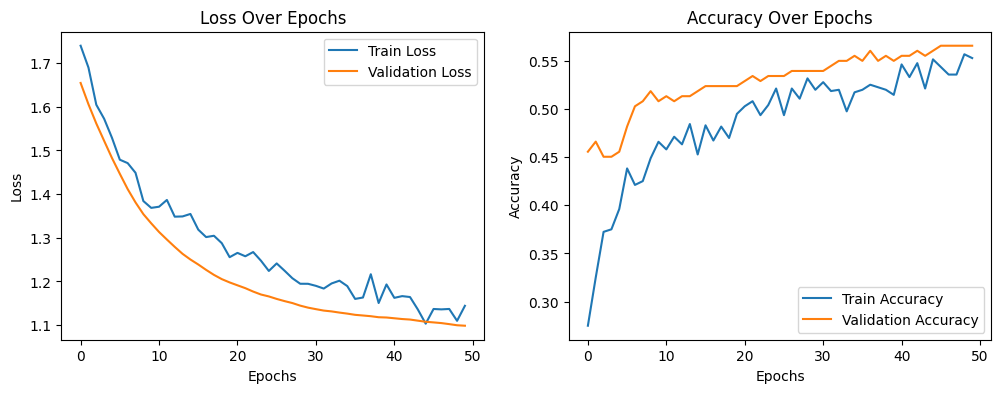

In [22]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

D. Design new architecture/update existing architecture in attempt to improve the performance of the model

In [25]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()

model.add(Dense(128, input_dim=xtrain_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(ytrain_encoded.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(xtrain_scaled, ytrain_encoded,
                    epochs=200,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

loss, accuracy = model.evaluate(xtest_scaled, ytest_encoded)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1994 - loss: 2.5207 - val_accuracy: 0.3194 - val_loss: 1.6856 - learning_rate: 0.0010
Epoch 2/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2571 - loss: 2.2895 - val_accuracy: 0.3560 - val_loss: 1.5612 - learning_rate: 0.0010
Epoch 3/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2991 - loss: 2.0015 - val_accuracy: 0.3665 - val_loss: 1.4870 - learning_rate: 0.0010
Epoch 4/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3491 - loss: 1.8318 - val_accuracy: 0.4398 - val_loss: 1.4095 - learning_rate: 0.0010
Epoch 5/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3688 - loss: 1.7462 - val_accuracy: 0.4450 - val_loss: 1.3566 - learning_rate: 0.0010
Epoch 6/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3628 - loss: 1.7053 - val_accuracy: 0.4555 - val_loss: 1.2865 - learning_rate: 0.0010
Epoch 7/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4045 - loss: 1.5739 - val_ac

E. Plot visuals as in Q3.C and share insights about difference observed in both the models

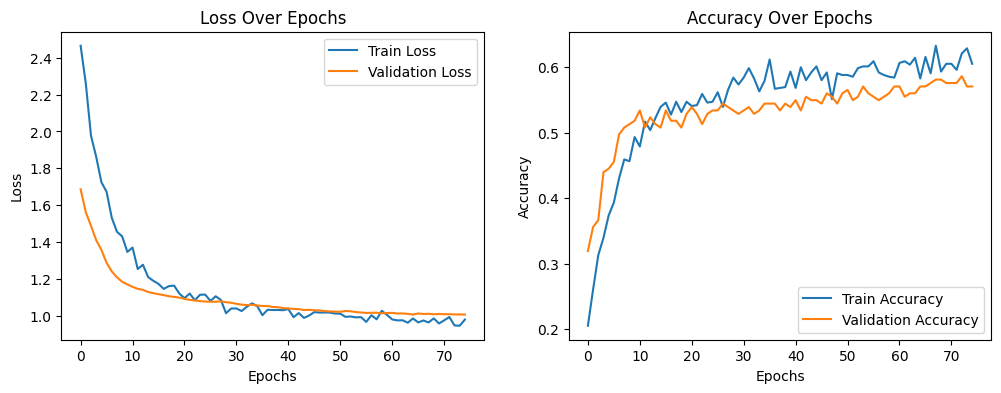

In [26]:

# plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


- The loss has reduced from 1.12 to 1.05
- The accuracy on test data has improved from 48 to 56% percent

Though the loss and accuracy or not the best, with effective cleaning we can achieve more. There is also imbalance in the target variable as signal_strength 5 and 6 were more than others.

# PART - B

• DOMAIN:  Autonomous Vehicles 

• CONTEXT:  A  Recognising  multi-digit  numbers  in  photographs  captured  at  street  level  is  an  important  component  of  modern-day  map making.  A  classic  example  of  a  corpus  of  such  street-level  photographs  is  Google’s  Street  View  imagery  composed  of  hundreds  of  millions 
of geo-located 360-degree panoramic images.  The  ability  to  automatically  transcribe  an  address  number  from  a  geo-located  patch  of  pixels  and  associate  the  transcribed  number  with  a 
known  street  address  helps  pinpoint,  with  a  high  degree  of  accuracy,  the  location  of  the  building  it  represents.  More  broadly,  recognising numbers in photographs is a problem of interest to the optical character recognition community.  While  OCR  on  constrained  domains  like  document  processing  is  well  studied,  arbitrary  multi-character  text  recognition  in  photographs  is 
still  highly  challenging.  This  difficulty  arises  due  to  the  wide  variability  in  the  visual  appearance  of  text  in  the  wild  on  account  of  a  large range of fonts, colours, styles, orientations, and character arrangements.  The  recognition  problem  is  further  complicated  by  environmental  factors  such  as  lighting,  shadows,  specularity,  and  occlusions  as  well  as 
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a  single  digit  (many  of  the  images  do  contain  some  distractors  at  the  sides).  Although  we  are  taking  a  sample  of  the  data  which  is  simpler, 
it is more complex than MNIST because of the distractors. 

• DATA  DESCRIPTION: The  SVHN  is  a  real-world  image  dataset  for  developing  machine  learning  and  object  recognition  algorithms  with  the minimal  requirement  on  data  formatting  but  comes  from  a  significantly  harder,  unsolved,  real-world  problem  (recognising  digits  and 
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. 
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively. 

 PROJECT OBJECTIVE: To build a digit classi fier on the SVHN (Street View Housing Number) dataset

1. Data Import and Exploration

A. Read the .h5 file and assign to a variable.

In [89]:
import h5py

dict = {}
with h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r') as file:
    keys = list(file.keys())
    for key in keys:
        dict[key] = file[key][...]


B. Print all the keys from the .h5 file

In [90]:
print(dict.keys())

dict_keys(['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val'])


C. Split the data into X_train, X_test, Y_train, Y_test

In [91]:
X_test = dict['X_test']
X_train = dict['X_train']
y_test = dict['y_test']
y_train = dict['y_train']

2. Data Visualisation and preprocessing:

A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [92]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)


B. Visualise first 10 images in train data and print its corresponding labels

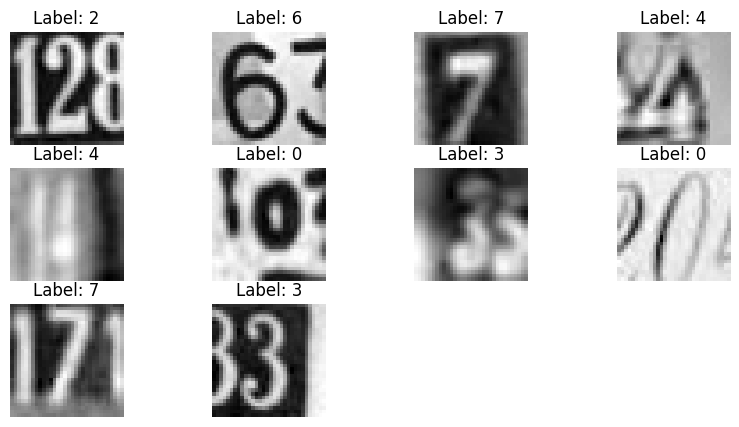

In [93]:
plt.figure(figsize=(10, 5)) 

for i in range(10): 
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_train[i], cmap='grey')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

C. Reshape all the images with appropriate shape update the data in same variable

In [94]:
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

print("New shape of X_train:", X_train.shape)
print("New shape of X_test:", X_test.shape)

New shape of X_train: (42000, 32, 32, 1)
New shape of X_test: (18000, 32, 32, 1)


D. Normalise the images i.e. Normalise the pixel values.

In [95]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

E. Transform Labels into format acceptable by Neural Network

In [96]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


print("New shape of y_train:", y_train_encoded.shape)
print("New shape of y_test:", y_test_encoded.shape)


New shape of y_train: (42000, 10)
New shape of y_test: (18000, 10)


F. Print total Number of classes in the Dataset

In [100]:
print(f'class labels: {(np.unique(y_train))}')
print(f'Total number of classes: {(len(np.unique(y_train)))}')

class labels: [0 1 2 3 4 5 6 7 8 9]
Total number of classes: 10


3. Model Training & Evaluation using Neural Network

A. Design a Neural Network to train a classifier

In [102]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = y_train_encoded.shape[1]

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

B. Train the classifier using previously designed Architecture (Use best suitable parameters)

In [104]:
import tensorflow as tf
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=64, 
                    validation_split=0.2, callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.1706 - loss: 2.1884 - val_accuracy: 0.7729 - val_loss: 0.8402
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7048 - loss: 0.9438 - val_accuracy: 0.8362 - val_loss: 0.6036
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7806 - loss: 0.7163 - val_accuracy: 0.8619 - val_loss: 0.4994
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8042 - loss: 0.6339 - val_accuracy: 0.8654 - val_loss: 0.4704
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.8153 - loss: 0.5948 - val_accuracy: 0.8764 - val_loss: 0.4384
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8302 - loss: 0.5546 - val_accuracy: 0.8860 - val_loss: 0.4073
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8325 - loss: 0.5356 - val_accuracy: 0.8849 - val_loss: 0.4049
Epoch 8/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.8422 - loss: 0.5082 - v

C. Evaluate performance of the model with appropriate metrics

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy:.4f}")

y_pred_encoded = model.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9114 - loss: 0.3098
Test accuracy: 0.9066
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1814
           1       0.88      0.92      0.90      1828
           2       0.93      0.92      0.92      1803
           3       0.89      0.86      0.88      1719
           4       0.91      0.93      0.92      1812
           5       0.88      0.91      0.90      1768
           6       0.89      0.89      0.89      1832
           7       0.93      0.93      0.93      1808
           8       0.92      0.86      0.89      1812
           9       0.90      0.89      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



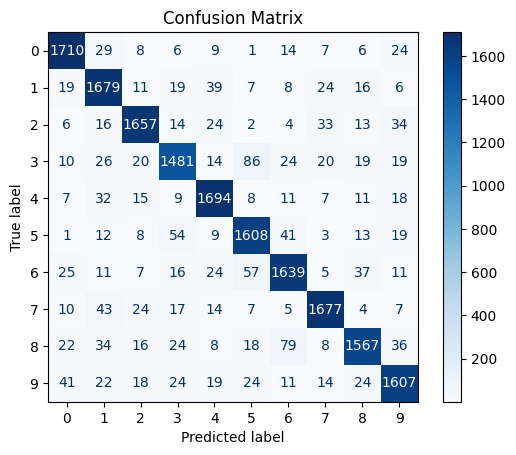

In [107]:
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your 
observations on the same.

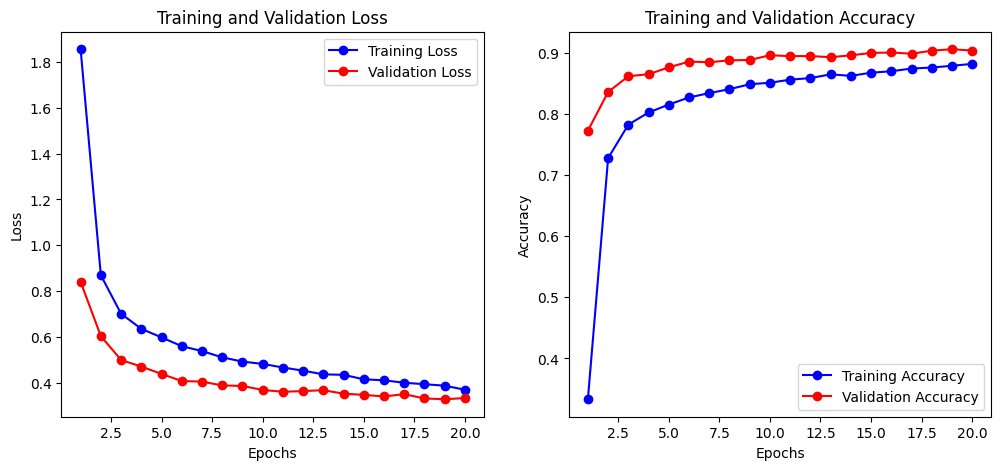

In [109]:
import matplotlib.pyplot as plt

history_dict = history.history

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

- We have got good level of accuracy around 90%

- The validation loss starts lower and decreases, remaining consistently below the training loss , and The training loss starts high and decreases steadily but remains higher than the validation loss.

- The validation accuracy starts higher and increases, remaining consistently above the training accuracy.